## Chamada para apenas 1(um) arquivo
### Lendo uma imagem

In [36]:
import cv2
import json
import requests
import numpy as np
import matplotlib.pyplot as plt

In [37]:
BASE_PATH = '/home/italojs/Pictures/docs/'

In [38]:
image = cv2.imread('{}Document 17.jpg'.format(BASE_PATH))

In [39]:
print(image.shape)

(1755, 1104, 3)


### Convertendo e visualizando nossa imagem

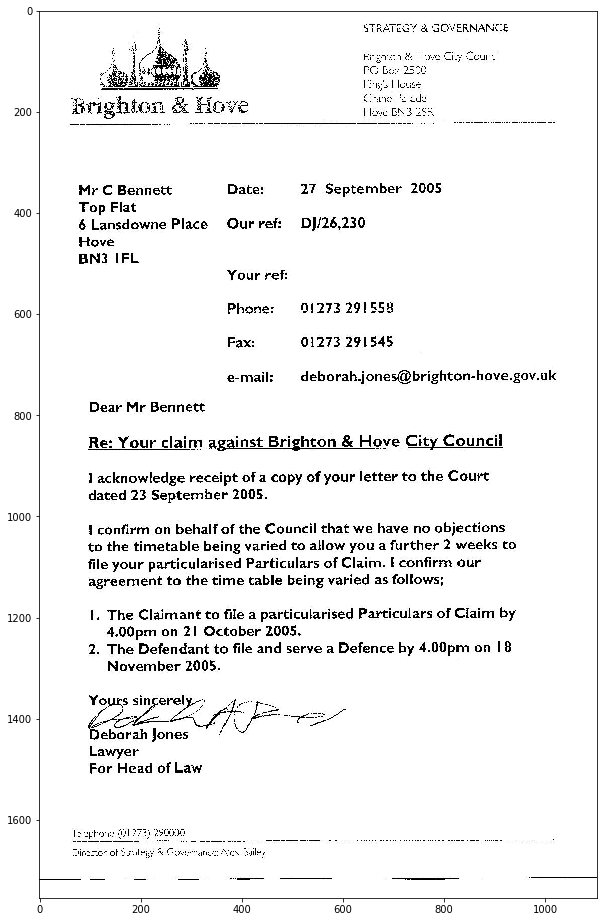

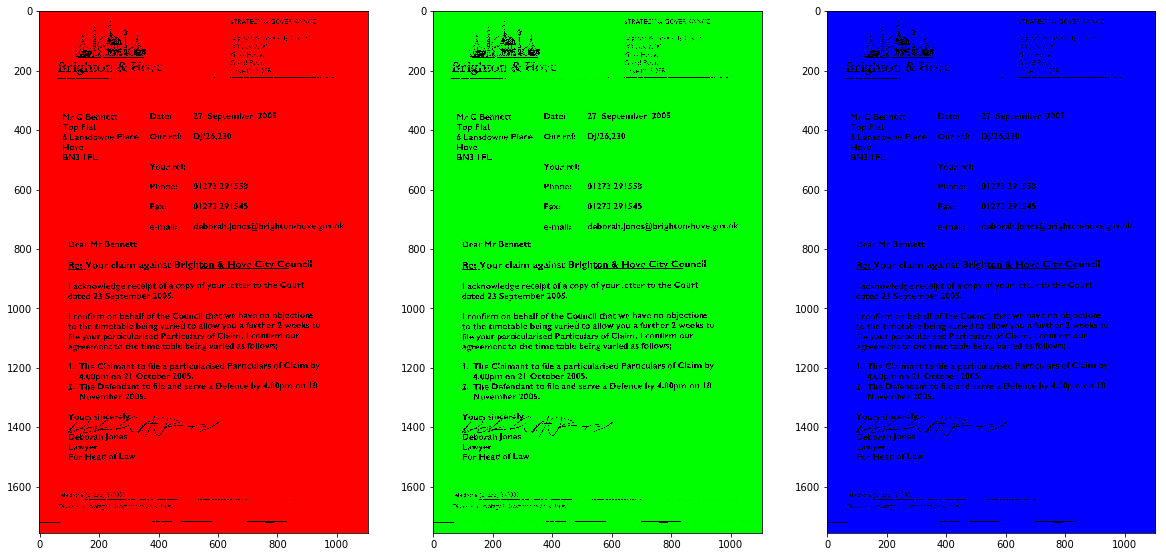

In [40]:
plt.figure(figsize=(10,20))
plt.imshow(image)

figure, plots = plt.subplots(ncols=3, nrows=1, figsize=(20,15))
for i, subplot in zip(range(3), plots):
    temp = np.zeros(image.shape, dtype='uint8')
    temp[:,:,i] = image[:,:,i]
    subplot.imshow(temp)
plt.show()

In [41]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
print(gray.shape)

(1755, 1104)


In [42]:
print(gray[150:,150:])

[[ 19   0   6 ... 255 255 255]
 [  0  12   6 ... 255 255 255]
 [  0   0   2 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


### Recortando nossa imagem

In [43]:
t_y,b_y,l_x  = 310, 380, 490
cropped_image = image[t_y:b_y,l_x:]

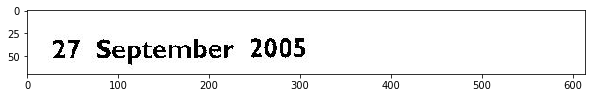

In [44]:
plt.figure(figsize=(10,20))
plt.imshow(cropped_image)

In [45]:
KEY = 'SUA_KEY'
visionBaseUrl = 'https://westcentralus.api.cognitive.microsoft.com/vision/v2.0/'
ocrUrl = visionBaseUrl + "ocr"

_, encoded_image = cv2.imencode('.png', cropped_image)
buffer = encoded_image.tobytes()
    
headers = {'Ocp-Apim-Subscription-Key': KEY,
        'Content-Type': 'application/octet-stream'}
params  = {'detectOrientation': 'true'}
# 'language: pt'

try:
    response = requests.post(ocrUrl, headers=headers, params=params, data=buffer)
    response.raise_for_status()

    analysis = response.json()
except Exception as e:
    raise Exception(e)
    
print(json.dumps(analysis, indent=2))

{
  "language": "en",
  "textAngle": 0.0,
  "orientation": "Up",
  "regions": [
    {
      "boundingBox": "29,31,277,29",
      "lines": [
        {
          "boundingBox": "29,31,277,29",
          "words": [
            {
              "boundingBox": "29,33,29,20",
              "text": "27"
            },
            {
              "boundingBox": "77,32,151,28",
              "text": "September"
            },
            {
              "boundingBox": "246,31,60,21",
              "text": "2005"
            }
          ]
        }
      ]
    }
  ]
}


In [46]:
line_infos = [region["lines"] for region in analysis["regions"]]
texts = []
for line in line_infos:
    for wordMetadata in line:
        for wordInfo in wordMetadata["words"]:
            texts.append(wordInfo["text"])

image_name = ' '.join(texts)
cv2.imwrite('{}{}.jpg'.format(BASE_PATH, image_name), image)

True

## Chamada para mais de 1(um) arquivo

In [47]:
import cv2
import glob
import requests

In [48]:
i = 0
BASE_PATH = '/home/italojs/Pictures/docs/'
for path in glob.glob(BASE_PATH +'*.jpg'):
    image = cv2.imread(path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    t_y,b_y,l_x  = 310, 380, 490
    cropped_image = image[t_y:b_y,l_x:, :]
    
    # converting to buffer
    _, encoded_image = cv2.imencode('.png', cropped_image)
    buffer = encoded_image.tobytes()
    
    KEY = '0c7089438f064d6da17fe9a17c2a4fa0'
    visionBaseUrl = 'https://westcentralus.api.cognitive.microsoft.com/vision/v2.0/'
    ocrUrl = visionBaseUrl + "ocr"


    headers = {'Ocp-Apim-Subscription-Key': KEY,
               'Content-Type': 'application/octet-stream'}
    params  = {'detectOrientation': 'true'}

    try:
        response = requests.post(ocrUrl, headers=headers, params=params, data=buffer)
        response.raise_for_status()

        analysis = response.json()
    except Exception as e:
        raise Exception(e)


    line_infos = [region["lines"] for region in analysis["regions"]]
    texts = []
    for line in line_infos:
        for wordMetadata in line:
            for wordInfo in wordMetadata["words"]:
                texts.append(wordInfo["text"])

    i = i+1
    image_name = ' '.join(texts)
    cv2.imwrite('{}renamed/{}({}).jpg'.format(BASE_PATH, image_name, i), image)